# Retail Store Performance #


This dataset provides a comprehensive collection of key performance indicators (KPIs) for retail stores, offering insights into factors influencing store performance, customer engagement, and financial outcomes. The dataset is suitable for various machine learning and data analysis tasks, including regression, classification, and clustering. It can help in understanding the relationships between operational metrics, store characteristics, and sales performance.

### Average Monthly Sales Revenue by Store Category


In [36]:
import warnings
warnings.filterwarnings('ignore')


In [37]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Store_CA.csv")

In [38]:
df

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,295,15,2681,235,58.5,15,10,5,88.7,Sacramento,Clothing,273.55
1646,761,8,1398,456,78.5,26,14,4,95.1,San Francisco,Clothing,432.82
1647,405,21,1490,465,76.7,18,12,5,73.0,Los Angeles,Clothing,303.52
1648,359,41,2042,350,67.6,2,6,7,105.0,Palo Alto,Clothing,241.39


# Average Monthly Sales Revenue by Store Category


  StoreCategory  AvgRevenue
0       Grocery      301.33
1      Clothing      300.86
2   Electronics      295.39


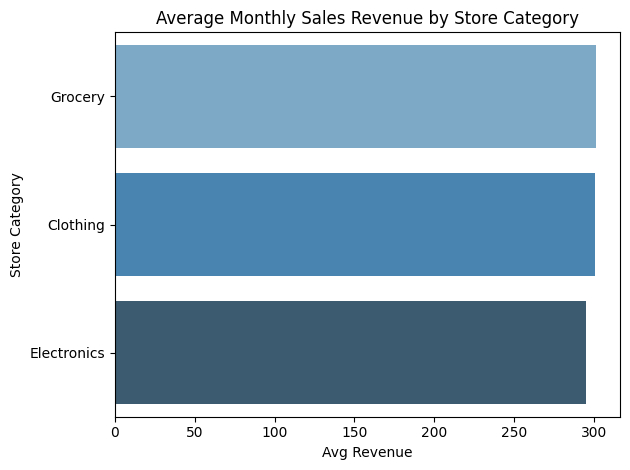

In [39]:
query1 = """
SELECT StoreCategory,
       ROUND(AVG(MonthlySalesRevenue), 2) AS AvgRevenue
FROM df
GROUP BY StoreCategory
ORDER BY AvgRevenue DESC
"""
result1 = ps.sqldf(query1, locals())
print(result1)

# Graph
sns.barplot(x='AvgRevenue', y='StoreCategory', data=result1, palette='Blues_d')
plt.title("Average Monthly Sales Revenue by Store Category")
plt.xlabel("Avg Revenue")
plt.ylabel("Store Category")
plt.tight_layout()
plt.show()


This analysis shows how much revenue, on average, each store category generates. It helps identify which product categories (like Electronics, Grocery, Clothing) are the most profitable.

Insight:
Store categories with higher average sales could receive more investments, promotions, or expansion plans.



# Total Sales Revenue by Store Location


   StoreLocation  TotalRevenue
0    Los Angeles     125596.79
1  San Francisco     123957.43
2     Sacramento     122778.68
3      Palo Alto     121435.02


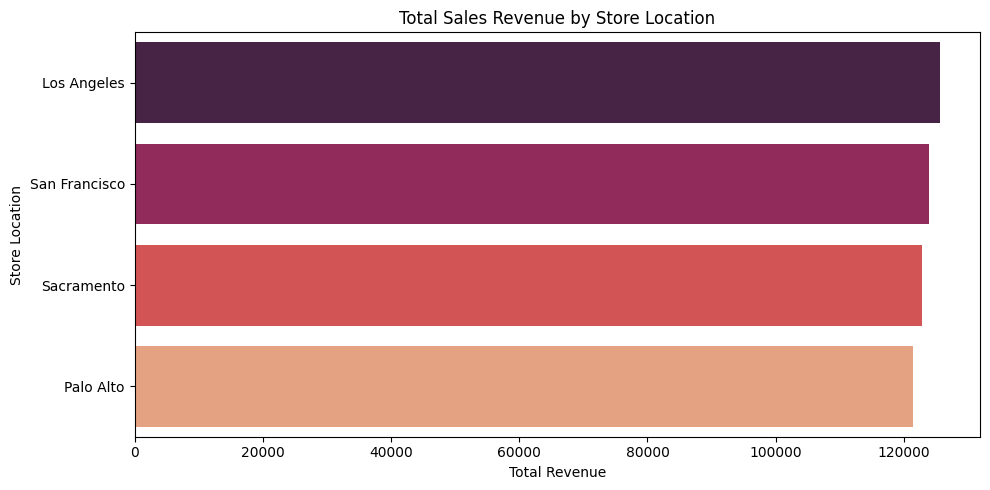

In [26]:
query2 = """
SELECT StoreLocation,
       ROUND(SUM(MonthlySalesRevenue), 2) AS TotalRevenue
FROM df
GROUP BY StoreLocation
ORDER BY TotalRevenue DESC
"""
result2 = ps.sqldf(query2, locals())
print(result2)

# Graph
plt.figure(figsize=(10, 5))
sns.barplot(x='TotalRevenue', y='StoreLocation', data=result2, palette='rocket')
plt.title("Total Sales Revenue by Store Location")
plt.xlabel("Total Revenue")
plt.ylabel("Store Location")
plt.tight_layout()
plt.show()


We summarize the total sales generated by each store location across California. This is useful for identifying top-performing cities.

Insight:

Cities like Los Angeles or San Diego may generate more revenue and can be considered for opening new branches or allocating more resources.


# Stores with Highest Monthly Sales Revenue


   StoreLocation StoreCategory  MonthlySalesRevenue
0      Palo Alto      Clothing               534.26
1    Los Angeles       Grocery               496.70
2      Palo Alto       Grocery               492.38
3  San Francisco       Grocery               479.27
4     Sacramento      Clothing               471.58


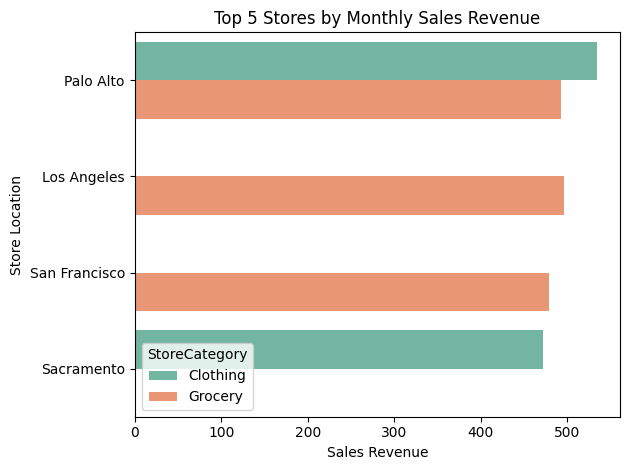

In [27]:
query3 = """
SELECT StoreLocation, StoreCategory, MonthlySalesRevenue
FROM df
ORDER BY MonthlySalesRevenue DESC
LIMIT 5
"""
result3 = ps.sqldf(query3, locals())
print(result3)

# Graph
sns.barplot(x='MonthlySalesRevenue', y='StoreLocation', hue='StoreCategory', data=result3, palette='Set2')
plt.title("Top 5 Stores by Monthly Sales Revenue")
plt.xlabel("Sales Revenue")
plt.ylabel("Store Location")
plt.tight_layout()
plt.show()



This highlights the top five performing stores in terms of individual monthly revenue. It includes both location and category.

Insight:
Successful stores can be used as models or benchmarks for performance improvement in other regions.

# Promotions Count vs Average Sales Revenue


   PromotionsCount  AvgRevenue
0                3      299.20
1                4      297.36
2                5      299.41
3                6      305.02
4                7      295.29
5                8      298.30


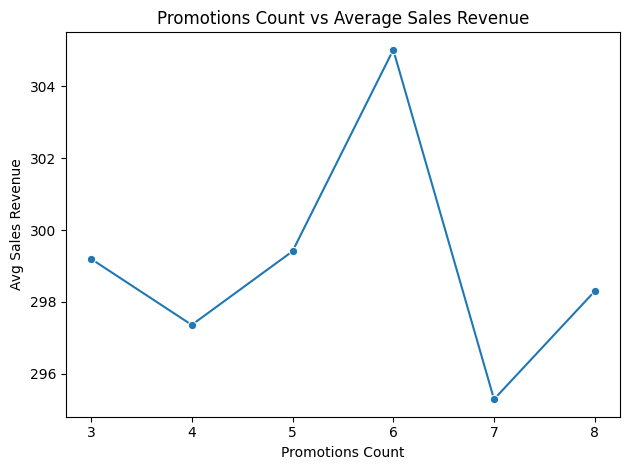

In [11]:
query4 = """
SELECT PromotionsCount,
       ROUND(AVG(MonthlySalesRevenue), 2) AS AvgRevenue
FROM df
GROUP BY PromotionsCount
ORDER BY PromotionsCount
"""
result4 = ps.sqldf(query4, locals())
print(result4)

# Graph
sns.lineplot(x='PromotionsCount', y='AvgRevenue', data=result4, marker='o')
plt.title("Promotions Count vs Average Sales Revenue")
plt.xlabel("Promotions Count")
plt.ylabel("Avg Sales Revenue")
plt.tight_layout()
plt.show()



We examine how the number of promotional campaigns in a store affects its revenue performance.

Insight:
There appears to be a correlation between promotions and revenue. More promotions may lead to higher sales—but this must be optimized to avoid unnecessary expense.



# 5. Customer Footfall vs Monthly Sales Revenue


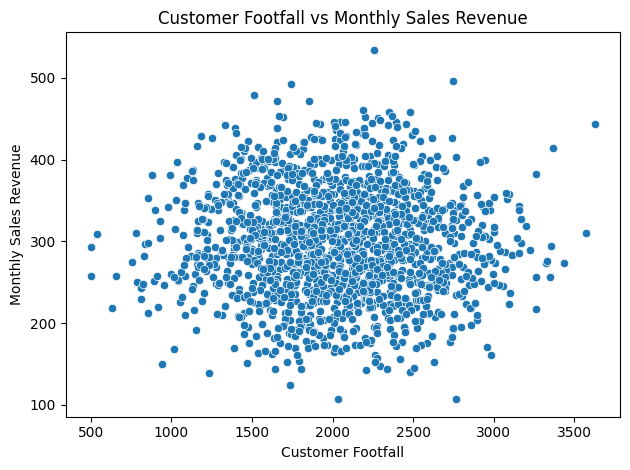

In [12]:
query5 = """
SELECT CustomerFootfall, MonthlySalesRevenue
FROM df
"""
result5 = ps.sqldf(query5, locals())

# Graph
sns.scatterplot(x='CustomerFootfall', y='MonthlySalesRevenue', data=result5)
plt.title("Customer Footfall vs Monthly Sales Revenue")
plt.xlabel("Customer Footfall")
plt.ylabel("Monthly Sales Revenue")
plt.tight_layout()
plt.show()


Description:
This scatterplot investigates whether there's a direct relationship between the number of customers visiting the store and the monthly sales revenue.

Insight:
Higher footfall often results in higher revenue, but some stores may have better conversion rates despite lower footfall.

# Average Revenue by Store Age Group


  StoreAgeGroup  AvgRevenue
0       0-5 yrs      300.47
1     11-20 yrs      296.31
2     21-30 yrs      304.07
3      6-10 yrs      294.34


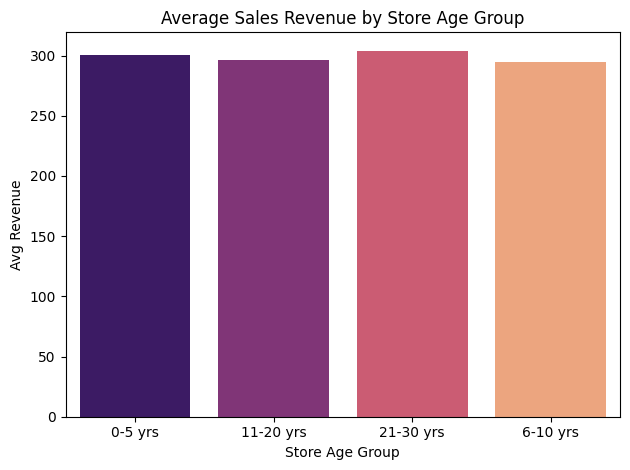

In [32]:
# Create age bins first (in pandas, not SQL)
df['StoreAgeGroup'] = pd.cut(df['StoreAge'], bins=[0, 5, 10, 20, 30, 50], 
                             labels=['0-5 yrs', '6-10 yrs', '11-20 yrs', '21-30 yrs', '30+ yrs'])

# SQL-style query
query6 = """
SELECT StoreAgeGroup,
       ROUND(AVG(MonthlySalesRevenue), 2) AS AvgRevenue
FROM df
GROUP BY StoreAgeGroup
ORDER BY StoreAgeGroup
"""
result6 = ps.sqldf(query6, locals())
print(result6)

# Graph
sns.barplot(x='StoreAgeGroup', y='AvgRevenue', data=result6, palette='magma')
plt.title("Average Sales Revenue by Store Age Group")
plt.xlabel("Store Age Group")
plt.ylabel("Avg Revenue")
plt.tight_layout()
plt.show()


We grouped stores by age (0–5 years, 6–10 years, etc.) to see how experience or maturity of a store affects its revenue.

Insight:
Older stores might benefit from brand loyalty, but newer stores might show faster growth or higher efficiency.

#  Revenue by Employee Efficiency Level


  EfficiencyLevel  AvgRevenue
0       Very High      300.39
1        Moderate      300.24
2            High      300.20
3             Low      295.98


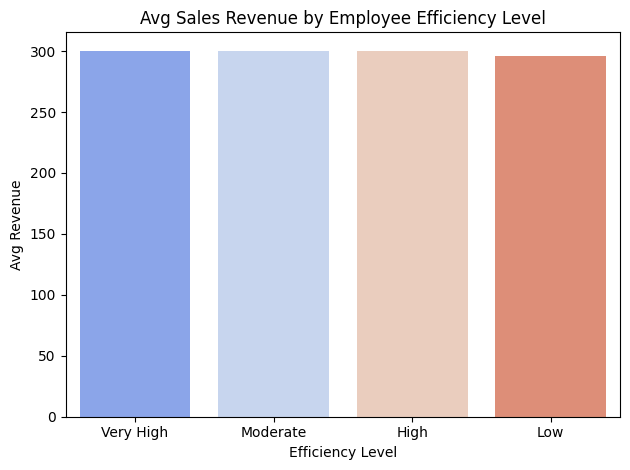

In [33]:
# Bin efficiency into categories
df['EfficiencyLevel'] = pd.cut(df['EmployeeEfficiency'], bins=[0, 60, 75, 90, 100],
                               labels=['Low', 'Moderate', 'High', 'Very High'])

query7 = """
SELECT EfficiencyLevel,
       ROUND(AVG(MonthlySalesRevenue), 2) AS AvgRevenue
FROM df
GROUP BY EfficiencyLevel
ORDER BY AvgRevenue DESC
"""
result7 = ps.sqldf(query7, locals())
print(result7)

# Graph
sns.barplot(x='EfficiencyLevel', y='AvgRevenue', data=result7, palette='coolwarm')
plt.title("Avg Sales Revenue by Employee Efficiency Level")
plt.xlabel("Efficiency Level")
plt.ylabel("Avg Revenue")
plt.tight_layout()
plt.show()


Stores are classified into efficiency levels based on employee performance. We analyze how these levels impact revenue.

Insight:
Stores with high or very high employee efficiency generally report better sales outcomes.

# Economic Indicator vs Monthly Sales Revenue


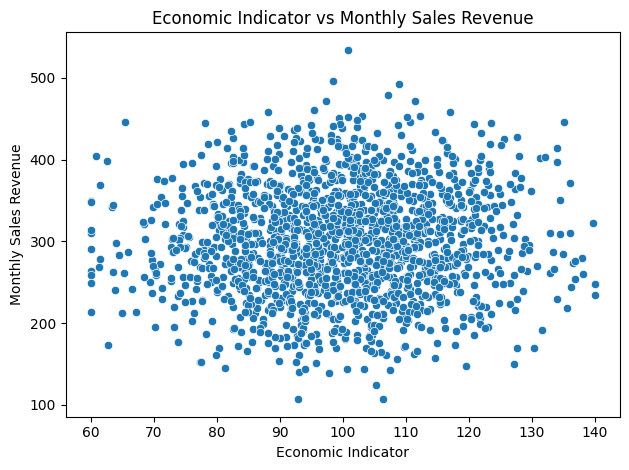

In [15]:
query8 = """
SELECT EconomicIndicator, MonthlySalesRevenue
FROM df
"""
result8 = ps.sqldf(query8, locals())

# Graph
sns.scatterplot(x='EconomicIndicator', y='MonthlySalesRevenue', data=result8)
plt.title("Economic Indicator vs Monthly Sales Revenue")
plt.xlabel("Economic Indicator")
plt.ylabel("Monthly Sales Revenue")
plt.tight_layout()
plt.show()


This analysis shows how local economic conditions (represented by an economic index) affect store revenue.

Insight:
Stores in economically strong regions tend to perform better. This can influence location-based investment strategies.



# Store Size vs Monthly Sales Revenue 

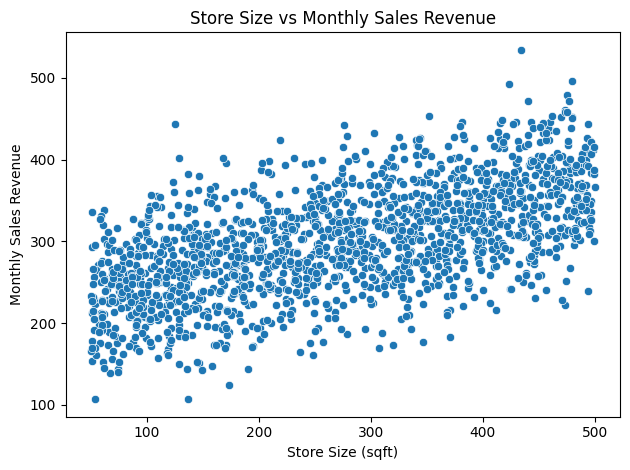

In [40]:
query9 = """
SELECT StoreSize, MonthlySalesRevenue
FROM df
"""
result9 = ps.sqldf(query9, locals())

# Graph
sns.scatterplot(x='StoreSize', y='MonthlySalesRevenue', data=result9)
plt.title("Store Size vs Monthly Sales Revenue")
plt.xlabel("Store Size (sqft)")
plt.ylabel("Monthly Sales Revenue")
plt.tight_layout()
plt.show()


This examines whether the physical size of a store has any relationship with the revenue it generates.

Insight:
Larger stores may offer more products but also come with higher maintenance costs. Understanding this balance is crucial.



# Top 5 Cities for Electronics by Avg Revenue


   StoreLocation  AvgRevenue
0    Los Angeles      303.07
1     Sacramento      293.89
2      Palo Alto      293.18
3  San Francisco      290.96


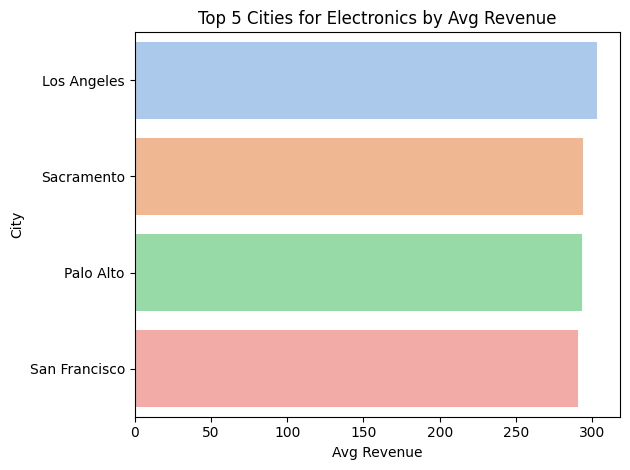

In [34]:
query10 = """
SELECT StoreLocation, 
       ROUND(AVG(MonthlySalesRevenue), 2) AS AvgRevenue
FROM df
WHERE StoreCategory = 'Electronics'
GROUP BY StoreLocation
ORDER BY AvgRevenue DESC
LIMIT 5
"""
result10 = ps.sqldf(query10, locals())
print(result10)

# Graph
sns.barplot(x='AvgRevenue', y='StoreLocation', data=result10, palette='pastel')
plt.title("Top 5 Cities for Electronics by Avg Revenue")
plt.xlabel("Avg Revenue")
plt.ylabel("City")
plt.tight_layout()
plt.show()


Focused analysis on Electronics stores to find out which cities generate the highest average revenue in that category.

Insight:
Cities with strong electronics sales can guide targeted marketing or exclusive product launches.

#  Product Variety vs Monthly Sales Revenue


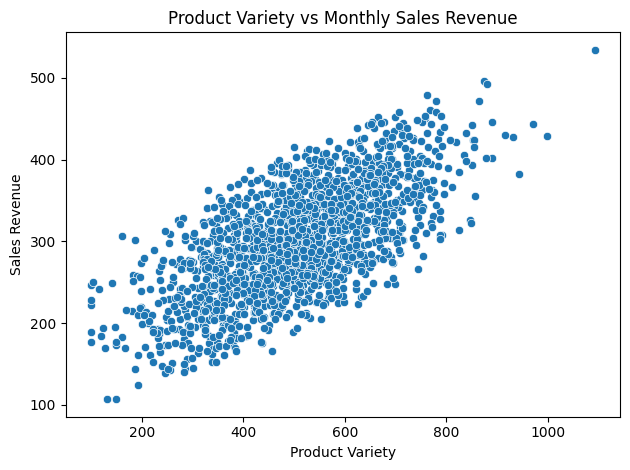

In [35]:
query11 = """
SELECT ProductVariety, MonthlySalesRevenue
FROM df
"""
result11 = ps.sqldf(query11, locals())

# Graph
sns.scatterplot(x='ProductVariety', y='MonthlySalesRevenue', data=result11)
plt.title("Product Variety vs Monthly Sales Revenue")
plt.xlabel("Product Variety")
plt.ylabel("Sales Revenue")
plt.tight_layout()
plt.show()


This chart explores whether offering more product variety positively impacts sales.

Insight:
A broader product range may increase customer attraction and revenue, but diminishing returns may appear beyond a certain point.

